<a href="https://colab.research.google.com/github/tmtuan/ml/blob/master/iris_ppn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Python ML - 2nd Edition **
### Chapter 3

In [0]:
from sklearn import datasets

In [0]:
import numpy as np


In [0]:
iris = datasets.load_iris()

In [0]:
# 1. Feature selection
X = iris.data[:,[2, 3]]

In [0]:
y = iris.target

In [6]:
print('Class labels: ', np.unique(y))

Class labels:  [0 1 2]


In [7]:
# iris names
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

# **Split datasets into training and test datasets**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# 2. Dataset split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [10]:
# Check whether the proportion of data for each label is balanced
print('Label counts in y: ', np.bincount(y))
print('Labels counts in y_train: ', np.bincount(y_train))
print('Labels counts in y_test: ', np.bincount(y_test))

Label counts in y:  [50 50 50]
Labels counts in y_train:  [35 35 35]
Labels counts in y_test:  [15 15 15]


In [0]:
from sklearn.preprocessing import StandardScaler


In [0]:
# 3. Feature Value Scaling
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# **Start training a model**

In [0]:
from sklearn.linear_model import Perceptron

In [14]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

# **Test the model**

In [17]:
y_pred = ppn.predict(X_test_std)
print('Misclassfied samples: %d' % (y_test != y_pred).sum())

Misclassfied samples: 1


# **Calculate the accuracy of the model**

In [0]:
from sklearn.metrics import accuracy_score

In [19]:
print('Accuracy: %.2f %% ' % (accuracy_score(y_test, y_pred) * 100))

Accuracy: 97.78 % 


# **Plot the classification**

In [0]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [0]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  # setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolors='black')
  
  # highlight test samples
  if test_idx:
    # plot test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]

    plt.scatter(X_test[:,0], X_test[:, 1], c='', edgecolors='black', alpha=1.0, linewidths=1, marker='o', s=100, label='test set')

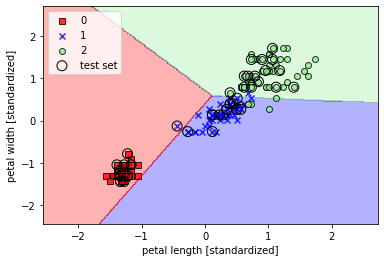

In [33]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()